In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
plt.style.use("seaborn")

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
130,53440,Female,73.0,1,0,Yes,Private,Rural,190.14,36.5,never smoked,1
4524,71622,Female,56.0,0,0,Yes,Private,Urban,144.33,29.2,never smoked,0
2759,18671,Female,47.0,0,0,Yes,Govt_job,Rural,111.68,39.5,never smoked,0
3687,25630,Female,69.0,0,0,Yes,Self-employed,Urban,79.70,25.0,never smoked,0
1534,71322,Female,38.0,0,0,Yes,Private,Rural,196.20,32.8,never smoked,0
2287,15964,Female,64.0,1,0,Yes,Private,Rural,99.40,29.1,never smoked,0
1913,10333,Female,45.0,0,0,Yes,Private,Urban,90.35,22.3,never smoked,0
4625,37808,Female,34.0,0,0,No,Govt_job,Urban,226.28,38.4,Unknown,0
4589,45285,Male,37.0,0,0,Yes,Private,Urban,176.42,39.7,Unknown,0
470,46474,Male,26.0,0,0,Yes,Private,Rural,100.09,27.4,never smoked,0


In [3]:
df.rename(columns = {'id': 'ID', 'gender': 'Sexo', 'age': 'Idade', 'hypertension': 'Hipertenso', 'heart_disease': 'Problemas_Coracao', 'ever_married': 'Ja_Casado', 'work_type': 'Tipo_Trabalho', 'Residence_type': 'Tipo_Residencia', 'avg_glucose_level': 'AVG_Nivel_Glicose', 'smoking_status': 'Status_fumante', 'stroke': 'Derrame'}, inplace = True)

In [4]:
df.sample(5)

,ID,Sexo,Idade,Hipertenso,Problemas_Coracao,Ja_Casado,Tipo_Trabalho,Tipo_Residencia,AVG_Nivel_Glicose,bmi,Status_fumante,Derrame
2307,7683,Male,49.0,0,0,Yes,Self-employed,Rural,220.47,36.4,smokes,0
2102,50671,Male,78.0,1,1,Yes,Self-employed,Rural,199.88,29.6,formerly smoked,0
1566,18141,Male,76.0,0,1,Yes,Self-employed,Rural,101.43,29.1,Unknown,0
4716,5387,Female,82.0,0,0,No,Private,Rural,96.98,21.5,never smoked,0
2586,41175,Female,22.0,0,0,No,Govt_job,Urban,123.23,21.3,Unknown,0


In [5]:
# Número de atributos e valores
df.shape

(5110, 12)

In [6]:
# Tipo de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5110 non-null   int64  
 1   Sexo               5110 non-null   object 
 2   Idade              5110 non-null   float64
 3   Hipertenso         5110 non-null   int64  
 4   Problemas_Coracao  5110 non-null   int64  
 5   Ja_Casado          5110 non-null   object 
 6   Tipo_Trabalho      5110 non-null   object 
 7   Tipo_Residencia    5110 non-null   object 
 8   AVG_Nivel_Glicose  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  Status_fumante     5110 non-null   object 
 11  Derrame            5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Definindo tipo de dados
# ID não terá caracteristica de operações matemáticas, então passamos para string
# Idade é inteiro
# Hipertensão/Problemas_Coração/Derrame são categorias e não terão operações matemáticas passamos para object
df['ID'] = df['ID'].astype('object')
df['Idade'] = df['Idade'].astype('int')
df['Hipertenso'] = df['Hipertenso'].astype('object')
df['Problemas_Coracao'] = df['Problemas_Coracao'].astype('object')
df['Derrame'] = df['Derrame'].astype('object')

In [8]:
df.head()

,ID,Sexo,Idade,Hipertenso,Problemas_Coracao,Ja_Casado,Tipo_Trabalho,Tipo_Residencia,AVG_Nivel_Glicose,bmi,Status_fumante,Derrame
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5110 non-null   object 
 1   Sexo               5110 non-null   object 
 2   Idade              5110 non-null   int32  
 3   Hipertenso         5110 non-null   object 
 4   Problemas_Coracao  5110 non-null   object 
 5   Ja_Casado          5110 non-null   object 
 6   Tipo_Trabalho      5110 non-null   object 
 7   Tipo_Residencia    5110 non-null   object 
 8   AVG_Nivel_Glicose  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  Status_fumante     5110 non-null   object 
 11  Derrame            5110 non-null   object 
dtypes: float64(2), int32(1), object(9)
memory usage: 459.2+ KB


In [10]:
# Dados faltantes?
df.isna().sum()

ID                     0
Sexo                   0
Idade                  0
Hipertenso             0
Problemas_Coracao      0
Ja_Casado              0
Tipo_Trabalho          0
Tipo_Residencia        0
AVG_Nivel_Glicose      0
bmi                  201
Status_fumante         0
Derrame                0
dtype: int64

In [11]:
# Preenchido com a média da coluna
df.fillna(df['bmi'].mean(), inplace = True)

In [12]:
df.isna().sum()

ID                   0
Sexo                 0
Idade                0
Hipertenso           0
Problemas_Coracao    0
Ja_Casado            0
Tipo_Trabalho        0
Tipo_Residencia      0
AVG_Nivel_Glicose    0
bmi                  0
Status_fumante       0
Derrame              0
dtype: int64

## Quantas pessoas tiveram derrame?

In [13]:
# Categoria
# 1 - Derrame
# 0 - Não teve derrame
df['Derrame'].unique()

array([1, 0], dtype=int64)

In [14]:
df.query('Derrame == 1')['Derrame'].count()

# 249 entrevistados tiveram derrame

249

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

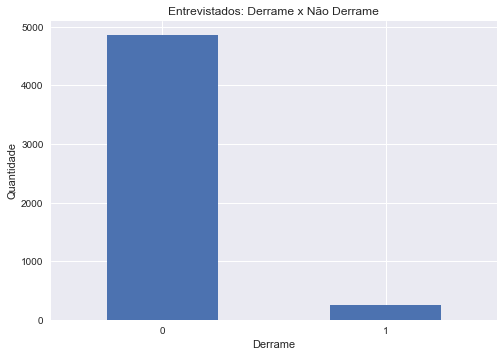

In [15]:
# Entrevistados que já teve derrame vs os que não tiveram derrame
df.groupby('Derrame')['Derrame'].count().plot.bar(title = 'Entrevistados: Derrame x Não Derrame')
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')

## O que podemos dizer sobre o atributo Sexo?

In [16]:
# São três classes declaradas pelos entrevistados
df['Sexo'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

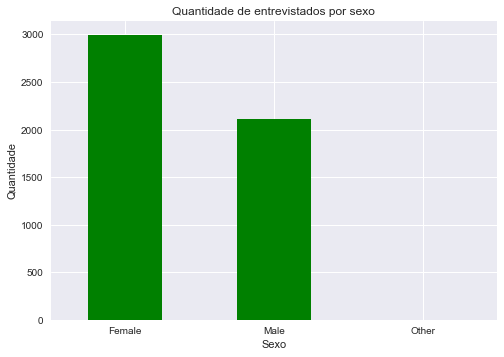

In [23]:
# Quantidade de entrevistados por sexo
df.groupby('Sexo')['Sexo'].count().plot.bar(title = 'Quantidade de entrevistados por sexo', color = 'green')
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')

In [21]:
# Apenas um entrevistado declarou Outros
df.query('Sexo == "Other"')['Sexo'].count()

1

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

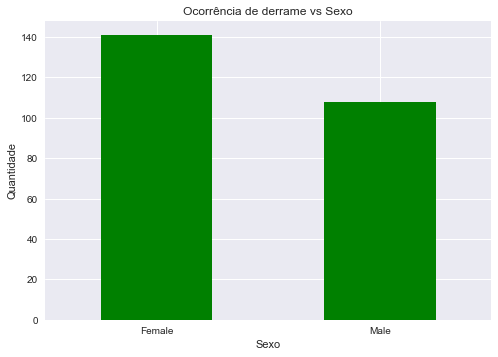

In [24]:
# Os entrevistados que tiveram derrame a maioria são mulheres
df.query('Derrame == 1').groupby('Sexo')['Sexo'].count().plot.bar(title = 'Ocorrência de derrame vs Sexo', color = 'green')
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')

## O que podemos observar da idade dos entrevistados?

In [25]:
# Média, mediana, maior, menor idade
df['Idade'].describe()

count    5110.000000
mean       43.215264
std        22.633866
min         0.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Distribuição de Idade')

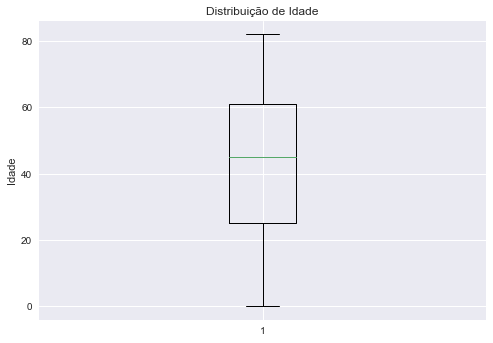

In [26]:
# Distribuição das idades
plt.boxplot(df['Idade'])
plt.ylabel('Idade')
plt.title('Distribuição de Idade')

In [27]:
# Idade média dos entrevistados que tiveram derrame
round(df.query('Derrame == 1')['Idade'].mean(), 2)

67.73

Text(0.5, 1.0, ' Distribuição de idades das pessoas que tiveram derrame')

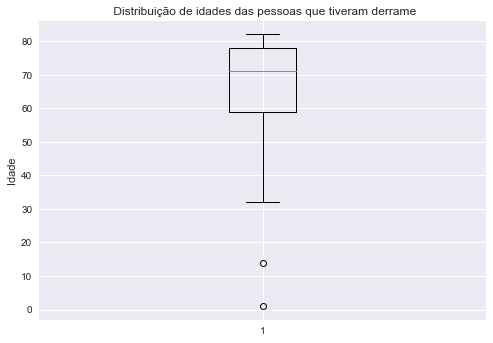

In [30]:
plt.boxplot(df.query('Derrame == 1')['Idade'])
plt.ylabel('Idade')
plt.title(' Distribuição de idades das pessoas que tiveram derrame')

# Pudemos observar que existe dois valores bem inferiores nos entrevistados que tiveram derrame, pode ser outliers

In [31]:
# registros fora do padrão
df.query('Derrame == 1 & Idade < 30')

,ID,Sexo,Idade,Hipertenso,Problemas_Coracao,Ja_Casado,Tipo_Trabalho,Tipo_Residencia,AVG_Nivel_Glicose,bmi,Status_fumante,Derrame
162,69768,Female,1,0,0,No,children,Urban,70.37,28.893237,Unknown,1
245,49669,Female,14,0,0,No,children,Rural,57.93,30.900000,Unknown,1


## Hipertesão tem relação com derrame?

In [32]:
# Correlação fraca
df['Derrame'].corr(df['Hipertenso'])

0.12790382346648044

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

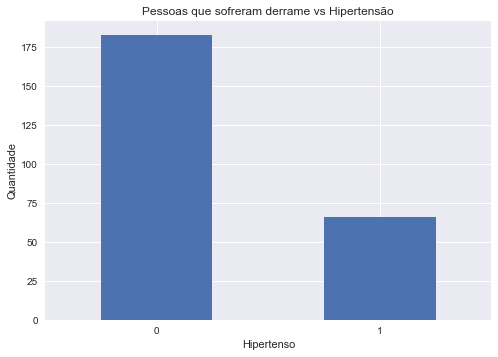

In [34]:
df.query('Derrame == 1').groupby('Hipertenso')['Hipertenso'].count().plot.bar(title = 'Pessoas que sofreram derrame vs Hipertensão')
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')

## O que podemos dizer Derrame vs Problemas no Coração?

In [42]:
# 0 - Não tem problemas de coração
# 1 - Problemas relacionados ao coração
df['Problemas_Coracao'].unique()

array([1, 0], dtype=int64)

In [43]:
# Correlação positiva fraca
df['Problemas_Coracao'].corr(df['Derrame'])

0.13491399696869297

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

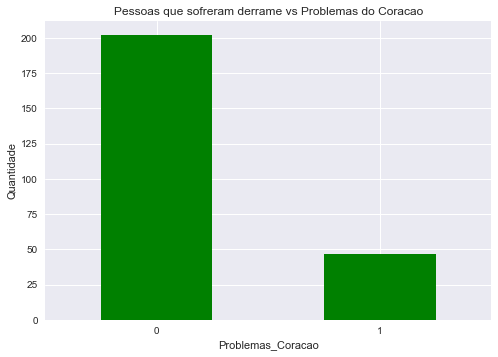

In [45]:
df.query('Derrame == 1').groupby('Problemas_Coracao')['Problemas_Coracao'].count().plot.bar(title = 'Pessoas que sofreram derrame vs Problemas do Coracao', color = 'green')
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')

## Quais entrevistados eram casados?

In [47]:
# Yes - Casados
# No - Não casados
df['Ja_Casado'].unique()

array(['Yes', 'No'], dtype=object)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

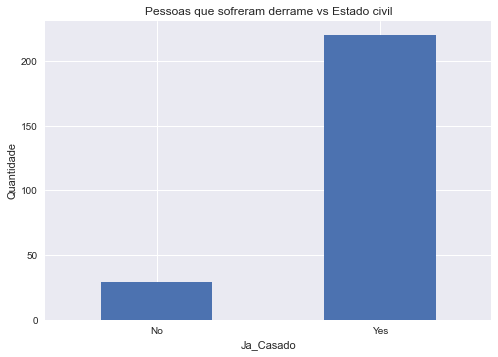

In [48]:
# A maioria que sofreram derrame eram casados
df.query('Derrame == 1').groupby('Ja_Casado')['Ja_Casado'].count().plot.bar(title = 'Pessoas que sofreram derrame vs Estado civil',)
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')

## Tipos de trabalho

In [49]:
df['Tipo_Trabalho'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

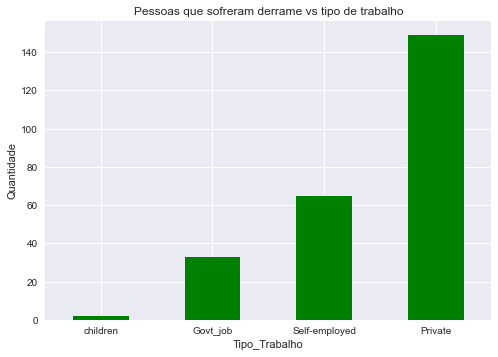

In [52]:
df.query('Derrame == 1').groupby('Tipo_Trabalho')['Tipo_Trabalho'].count().sort_values().plot.bar(title = 'Pessoas que sofreram derrame vs tipo de trabalho', color = 'green')
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')

In [53]:
# Aqueles dados vistos anteriormente
df.query('Derrame == 1 & Tipo_Trabalho == "children"')

,ID,Sexo,Idade,Hipertenso,Problemas_Coracao,Ja_Casado,Tipo_Trabalho,Tipo_Residencia,AVG_Nivel_Glicose,bmi,Status_fumante,Derrame
162,69768,Female,1,0,0,No,children,Urban,70.37,28.893237,Unknown,1
245,49669,Female,14,0,0,No,children,Rural,57.93,30.900000,Unknown,1


## Cidade ou Campo?

In [56]:
df['Tipo_Residencia'].unique()

array(['Urban', 'Rural'], dtype=object)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

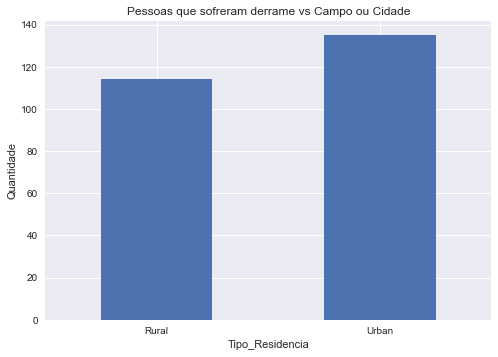

In [57]:
df.query('Derrame == 1').groupby('Tipo_Residencia')['Tipo_Residencia'].count().plot.bar(title = 'Pessoas que sofreram derrame vs Campo ou Cidade',)
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')

## Niveis de glicose

In [54]:
# Mediana, media
df['AVG_Nivel_Glicose'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: AVG_Nivel_Glicose, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2931b2ada90>,
 'caps': [<matplotlib.lines.Line2D at 0x2931ba327c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2931b25d880>],
 'medians': [<matplotlib.lines.Line2D at 0x2931ba3ba60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2931b975700>],
 'means': []}

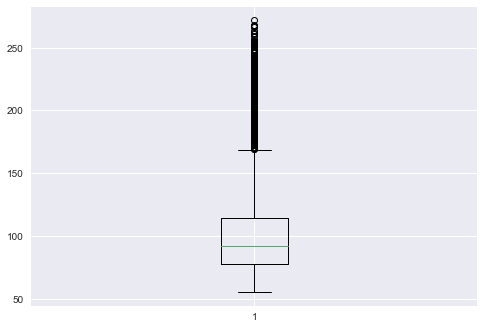

In [55]:
plt.boxplot(df['AVG_Nivel_Glicose'])

## Niveis BMI

In [60]:
# Mediana, media
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2931d590460>,
 'caps': [<matplotlib.lines.Line2D at 0x2931d590b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2931d5900d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2931d599220>],
 'fliers': [<matplotlib.lines.Line2D at 0x2931d599520>],
 'means': []}

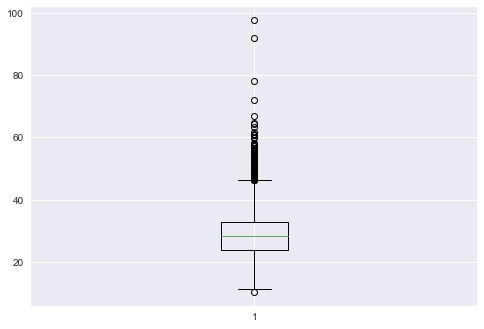

In [61]:
plt.boxplot(df['bmi'])

## Fumantes

In [62]:
df['Status_fumante'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

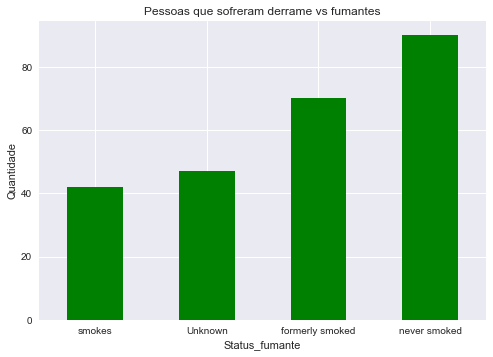

In [63]:
df.query('Derrame == 1').groupby('Status_fumante')['Status_fumante'].count().sort_values().plot.bar(title = 'Pessoas que sofreram derrame vs fumantes', color = 'green')
plt.ylabel('Quantidade')
plt.xticks(rotation='horizontal')